/mnt/hypercube/gzeng/miniconda3/envs/initno/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:  43%|████▎     | 3/7 [00:00<00:00,  7.29it/s]/mnt/hypercube/gzeng/miniconda3/envs/initno/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 50/50 [00:16<00:00,  3.01it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


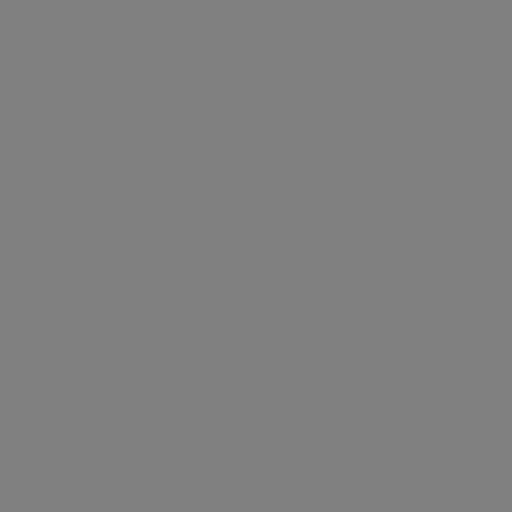

In [1]:
import diffusers,torch
from diffusers import StableDiffusionPipeline
from attn.ptp_utils import AttendExciteAttnProcessor, PositionalEmbeddedAttnProcessor, AttentionStore, register_attention_control

torch.manual_seed(0)

model_id = "runwayml/stable-diffusion-v1-5"

model = StableDiffusionPipeline.from_pretrained(model_id).to('cuda:1')

attention_store = AttentionStore(attn_res = 16)
model.attention_store = attention_store
register_attention_control(model.unet, model.attention_store)

prompt = 'a photo of a cat'

image = model(prompt).images[0]

image


In [2]:
aggregate_cross_attention_maps = attention_store.aggregate_attention(from_where=("up", "down", "mid"), is_cross=True)

aggregate_cross_attention_maps

tensor([[[9.9286e-01, 2.7756e-04, 8.6692e-04,  ..., 3.0535e-05,
          3.0987e-05, 3.0927e-05],
         [9.9373e-01, 1.9501e-04, 5.2799e-04,  ..., 2.8119e-05,
          2.8555e-05, 2.8569e-05],
         [9.8206e-01, 4.4121e-04, 8.8700e-04,  ..., 1.4487e-04,
          1.4701e-04, 1.3908e-04],
         ...,
         [7.1366e-01, 6.8991e-03, 7.4289e-03,  ..., 3.1709e-03,
          3.2139e-03, 3.1787e-03],
         [7.3171e-01, 5.6545e-03, 7.2566e-03,  ..., 3.1318e-03,
          3.1773e-03, 3.1157e-03],
         [7.1877e-01, 6.2844e-03, 8.2527e-03,  ..., 3.4244e-03,
          3.5020e-03, 3.3523e-03]],

        [[9.9141e-01, 4.0217e-04, 7.7935e-04,  ..., 4.6452e-05,
          4.7493e-05, 4.7375e-05],
         [9.9318e-01, 2.1025e-04, 4.5318e-04,  ..., 3.8571e-05,
          3.9259e-05, 3.9269e-05],
         [9.8546e-01, 3.6466e-04, 7.5226e-04,  ..., 1.3252e-04,
          1.3528e-04, 1.3210e-04],
         ...,
         [7.6266e-01, 5.3529e-03, 6.4402e-03,  ..., 2.5708e-03,
          2.597